# ARMA Transform
In this example we will be taking a wind speed file and putting it into the Raven ARMA transform.

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# OriginalDataset
Here we are reading the original dataset of wind speeds and power outputs.

In [9]:
data = pd.read_csv("OriginalDataset.csv")
#data

In [10]:
dataLatest = data[['LV ActivePower (kW)','Wind Speed (m/s)']]
#dataLatest

# Wind Input
Here we are writing the refined data from the original dataset to the input file that we will directly input into Raven. The two columns that we will input into Raven are power output and wind speed. This is due to the fact that ARMA requires two inputs. In the case of signals being retrieved from a reactor more relevant data can be selected. For this demonstration we will just focus specifically on the wind speed. 

In [11]:
df = dataLatest.iloc[0:144]
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].diff()
df.to_csv('WindInput.csv')
#df

In [12]:
import matplotlib.pyplot as plt

# Wind Output
Here we read the output of Raven. The graph only contains the output from the wind speeds. As we can see the actual data represented in red is closely mirrored by Raven's predictions graphed in blue.

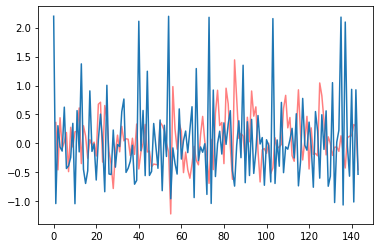

In [13]:
y = df['Wind Speed (m/s)']



dat = pd.read_csv('WindOutput.csv')
#print(dat)

plt.plot(dat.seconds, y, '-', alpha=0.5, color='red')
plt.plot(dat.seconds, dat.signal1)
plt.show()